## Array Programming

Let's consider the following lists (in Python we can use lists as arrays):

In [ ]:
v1 = [1,2,3,4]
v2 = [5,6,7,8]

print(v1[1])
print(len(v2))

2
4


If we wish to sum them, element-wise, we need some code:

In [ ]:
# option 1
v3 = [0] * len(v1)
for i in range(len(v1)):
  v3[i] = v1[i] + v2[i]

# option 2
v3 = [ i+j for (i,j) in zip(v1,v2) ]

print(v3)

[6, 8, 10, 12]


[Array programming](https://en.wikipedia.org/wiki/Array_programming) defines operations that apply to an entire set of values at once.

The first well-known language that included array programming was [APL](https://en.wikipedia.org/wiki/APL_(programming_language)). APL has a very strange syntax, but the use of array programming and extense math notation makes its code extremely terse. A classical example is implementation of the Game of Life:

    life ← {↑1 ⍵∨.∧3 4=+/,¯1 0 1∘.⊖¯1 0 1∘.⌽⊂⍵}

(btw, don't try to understand it :-)

But even if APL is rarely used nowadays, the language had a profound impact on the history of programming, namely array programming.

This influence shows in how R is programmed, in MATLAB, in Python's `numpy` module and in all dependent modules, like the deep learning module `TensorFlow`.

Also, many mathematical, statistical and engineer solutions rely heavily on matrix notation, where array programming shines.

### Numpy

Numpy is a module that facilitates array programming in Python. It manipulates data in vectors, matrices and higher-dimensional arrays.

In [ ]:
import numpy as np

With `numpy` we create array data structures of any dimension.

In [ ]:
x = np.array([[0,1,2],[3,4,5],[6,7,8],[9,10,11]])  # a 4x3 array
print(x)

x = np.arange(0,12).reshape(4,3) # alternative
print(x)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


Internally this is its representation:

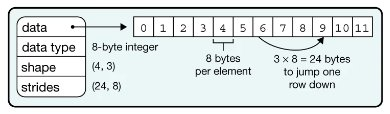

We can use Python's indexing notation to retrieve one element, a row, a column...

In [ ]:
print(x[1,2])
print(x[2,:])    # a row
print(x[:,1])    # a column
print(x[::-1,2]) # a column inverted

5
[6 7 8]
[ 1  4  7 10]
[11  8  5  2]


We can index values with a **mask** (i.e., filtering):

In [ ]:
print(x[x>=7])

mask = np.logical_or(x < 3, x > 9)
print(x[mask])

[ 7  8  9 10 11]
[ 0  1  2 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[False False False]
 [False False False]
 [False False  True]
 [ True  True  True]]


We can even use arrays to index the array:

In [ ]:
print(x[[0,1],[1,2]])

[1 5]


But this is just some fancing indexing, not enough to deserve the name of array programming.

Numpy arrays allow element-wise operators. Let's try to sum x with itself:

In [ ]:
y = x*2+5
print(y)

[[ 5  7  9]
 [11 13 15]
 [17 19 21]
 [23 25 27]]


`numpy` automatically adds each position of the array with itself. Without this module, we would need two cyles to perform array addition.

Moreover, this option is much faster because the implicit cycles are done in C compiled code.

`numpy` includes a **broadcast** mechanism that multiply each element of a vector into the elements of a 2nd vetor, making a higher-dimensional array:

In [ ]:
v1 = np.array([0,3,6,9]).reshape(4,1)
v2 = np.array([10,20])

print(v1)
print('-'*10)
print(v2)
print('-'*10)
v3 = v1*v2
print(v3)

[[0]
 [3]
 [6]
 [9]]
----------
[10 20]
----------
[[  0   0]
 [ 30  60]
 [ 60 120]
 [ 90 180]]


> The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. [source](https://numpy.org/doc/stable/user/basics.broadcasting.html)

Another feature is **reduction**, the ability of resume a row, column, or the entire array given a certain function:

In [ ]:
# compute sum for all columns
print(np.sum(v3, axis=0))

# compute means for all rows of v3
print(np.mean(v3, axis=1))

# compute max of entire array
print(np.max(v3,axis=(0,1)))
print(np.mean(v3))

[180 360]
[  0.  45.  90. 135.]
180
67.5


We can reduce with our own functions using `apply_along_axis`:

In [ ]:
def f(a):
    """Average first and last element of a 1-D array"""
    return (a[0] + a[-1]) * 0.5

print(np.apply_along_axis(f, 1, v3))    

[  0.  45.  90. 135.]


### Vectorization

The module includes a function called `vectorize` that creates a vectorized version of a given Python function. That is, the new function can be applied to an entire array:

In [ ]:
times10 = lambda x : 10*x

f = np.vectorize(times10)

print(f(v3))

[[   0    0]
 [ 300  600]
 [ 600 1200]
 [ 900 1800]]


## Matrix Calculus

`numpy` 2D arrays can be manipulated as matrices from Algebra.

In [ ]:
v = np.arange(1,5).reshape(4,1)
print(v)

M = np.arange(-9,11).reshape(5,4)
print(M)

[[1]
 [2]
 [3]
 [4]]
[[-9 -8 -7 -6]
 [-5 -4 -3 -2]
 [-1  0  1  2]
 [ 3  4  5  6]
 [ 7  8  9 10]]


What is $M \times v$?

In [ ]:
print(M @ v)  # function dot() also performs matrix multiplication

[[-70]
 [-30]
 [ 10]
 [ 50]
 [ 90]]


And $v \times M$?

In [ ]:
print(v @ M)

ValueError: ignored

Indeed, the dimensions does not match. Let's try multiplying $v^T \times M^T$:

In [ ]:
print(v.T @ M.T)

[[-70 -30  10  50  90]]


### Example: Least Squares

Consider the following data:

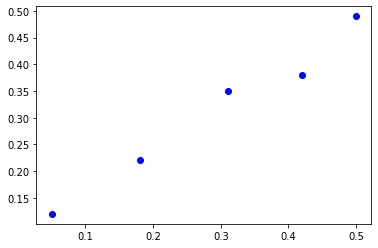

In [ ]:
x = np.array([0.05, 0.18, 0.31, 0.42, 0.50])
y = np.array([0.12, 0.22, 0.35, 0.38, 0.49])

import matplotlib.pyplot as plt
plt.scatter(x, y, color="b")   # plot the dataset

We wish to model this problem where the values of $y$ are being generated by a linear process based on values $X$.

In matrix form, the model is written as

$$y = X \beta + \epsilon$$

and we wish to find some $\hat{\beta}$ that 

$$y \approx X \hat{\beta}$$

given some criteria for approximation. 

Usually it is chosen to minimize the square of the errors $\sum_i (y_i - x_i \hat{\beta})^2$

The expression to solve with these constraints is:

$$\hat{\beta} = (X^T X)^{-1} X^T y$$

So for a given new $x^*$, we compute $y^* = X \hat{\beta}$

Using array programming computing these expressions is hugely simplified:

In [ ]:
from numpy.linalg import inv

X = np.vstack([x, np.ones(len(x))]).T # add column of 1s for intercept != 0

bhat = inv(X.T @ X) @ X.T @ y         # linear least squares
yhat = x * bhat[0] + bhat[1]          # predict y from known values of X using coefficients bhat

Let's plot the result:

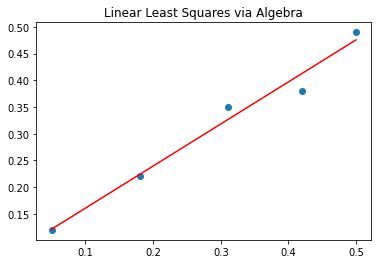

In [ ]:
plt.title("Linear Least Squares via Algebra")
plt.scatter(x, y)
plt.plot(x, yhat, color='red')
plt.show()

### Example: Positive semi-definite matrix

A [positive semi-definite matrix](https://en.wikipedia.org/wiki/Definite_symmetric_matrix) (psd) is the analogue of a non-negative number.

With a psd $n\times n$ matrix $M$ we guarantee that, for each non-null vector with compatible dimension, $v^T M v \geq 0$

There is more than one way to check this property, but the algorithms are slow. If $M$ is very big, we can use a faster random algorithm to check for counter-examples (the answer however will not be certain, only probabilistic).

In [ ]:
M = np.array([[-1,8,3,3],[5,1,4,-1],[9,2,4,7],[8,4,2,-6]])   # is M psd?
print(M)

[[-1  8  3  3]
 [ 5  1  4 -1]
 [ 9  2  4  7]
 [ 8  4  2 -6]]


In [ ]:
nTries = 1000
n = np.shape(M)[0] # number of rows

for _ in range(nTries):
  v = np.random.rand(n,1)-0.5  # create compatible random vector...
  val = v.T @ M @ v            # and check if condition is still true
  if val < 0:
    break                      # counter example found

if val>=0:
  print("M is psd")
else:
  print("M is not psd")

M is not psd


### Example: Buy Low, Sell High

[ref](https://realpython.com/numpy-array-programming/)  

> Given a stock’s price history as a sequence, and assuming that you are only allowed to make one purchase and one sale, what is the maximum profit that can be obtained? For example, given prices = (20, 18, 14, 17, 20, 21, 15), the max profit would be 7, from buying at 14 and selling at 21.

A typical $\mathcal{O}(n)$ solution that iterates *once* through the list finding the difference between each price and a running minimum:

In [ ]:
def profit(prices):
  max_px = 0
  min_px = prices[0]
  for px in prices[1:]:
    min_px = min(min_px, px)
    max_px = max(px - min_px, max_px)
  return max_px

prices = (20, 18, 14, 17, 20, 21, 15)
profit(prices)

7

The `numpy` version uses a vectorized function to accumulate the minimum (check [available](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs) `numpy` functions)

In [ ]:
print(np.minimum.accumulate(prices))  # accumulate running minimum

[20 18 14 14 14 14 14]


The solution becomes:

In [ ]:
def profit_vectorized(prices):
  """Price minus cumulative minimum price, element-wise."""
  prices = np.asarray(prices)
  return np.max(prices - np.minimum.accumulate(prices))

profit_vectorized(prices)

7

Let's check both solution's performance:

In [ ]:
from timeit import timeit

seq = np.random.randint(0, 100, size=10000)

setup = ('from __main__ import profit_vectorized, profit, seq; import numpy as np')
num   = 250

pytime = timeit('profit(seq)',            setup=setup, number=num)
nptime = timeit('profit_vectorized(seq)', setup=setup, number=num)
print('Speed difference: {:0.1f}x'.format(pytime / nptime))

Speed difference: 131.0x




---



### Example: Bayes Theorem

Consider the following problem:

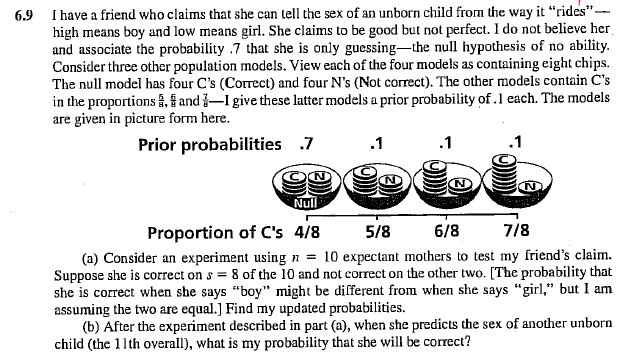

Answer a)

The model $H_i : \{ \text{percentage of correct guesses} = \theta_i\}$ 

The $\theta_i$ values stated in the problem for the four models are

In [ ]:
thetas = np.array([4,5,6,7]) / 8
thetas

array([0.5  , 0.625, 0.75 , 0.875])

The prior distributions for the models are:




In [ ]:
priors = np.array([.7,.1,.1,.1])

The likelihood of model $H_i$ is

$$p(C=c,N=n|H_i) = {n \choose c} ~ \theta_i^c ~ (1-\theta_i)^{n-c}$$

In [ ]:
from scipy.special import comb

def likelihood(theta, c, n):
  return comb(n,c) * theta**c * (1-theta)**(n-c)

The mentioned experiment is $D : \{ C=8, N=10 \}$.

So we can compute the likelihoods:

In [ ]:
likelihoods = likelihood(thetas, 8, 10)  
likelihoods

array([0.04394531, 0.14733814, 0.28156757, 0.24160002])

Using Bayes Theorem

$$p(H_i|D)=\frac{p(D|H_i) \times p(H_i)}{p(D)}=\frac{p(D|H_i) \times p(H_i)}{\sum_k p(D|H_k)p(H_k)}$$

We can compute this expression using the vectorized arithmetic operations, without any loops,

In [ ]:
evidence = sum(priors * likelihoods)  # p(D)

posteriors = (likelihoods * priors) / evidence

The answer for the model's posteriors are:

In [ ]:
posteriors

array([0.31449747, 0.15063356, 0.28786522, 0.24700374])

Since we are here, let's answer question b)

By the Law of total probability:

$$p(\text{correct|D}) = \sum_i p(\text{correct}, H_i|D) = \sum_i p(\text{correct} | H_i)p(H_i|D) = \sum_i p(C=1,N=1|H_i)p(H_i|D)$$

In [ ]:
sum(likelihood(thetas, 1, 1) * posteriors)

0.683421903548073

We can compare $p(\text{correct})$ previous to the experiment:


In [ ]:
sum(likelihood(thetas, 1, 1) * priors)

0.575